In [1]:
import joblib 

In [2]:
vars = joblib.load('my_variables.pkl')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# Model Implementation and Visualization

In [4]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt="g", cmap="coolwarm", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix', color='orange', fontsize=16)
    plt.show()

def XGB_model(x_train, x_test, y_train, y_test):
    model = XGBClassifier()
    model.fit(x_train, y_train)

    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    
    print("Classification Report for Training Set:\n")
    print(classification_report(y_train, train_predictions))
    
    print(f"Accuracy Score for Training Set: {train_accuracy}\n")
    
    print(f"ROC AUC Score for Training Set: {train_roc_auc}\n")

    print("Confusion Matrix for Training Set:\n")
    cm_train = confusion_matrix(y_train, train_predictions)
    plot_confusion_matrix(cm_train, labels=['Non-Fraud', 'Fraud'])
    
    print("\nClassification Report for Test Set:\n")
    print(classification_report(y_test, test_predictions))
    
    print(f"Accuracy Score for Test Set: {test_accuracy}\n")
    
    print(f"ROC AUC Score for Test Set: {test_roc_auc}\n")
    
    print("Confusion Matrix for Test Set:")
    cm_test = confusion_matrix(y_test, test_predictions)
    plot_confusion_matrix(cm_test, labels=['Non-Fraud', 'Fraud'])

# Model Cross Validation

In [5]:
def cross_val(x, y):
    
    xgb = XGBClassifier()

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scoring = {'roc_auc': 'roc_auc', 
               'f1': 'f1',
               'accuracy': 'accuracy'}

    cv_results = cross_validate(xgb, x, y, cv=skf, scoring=scoring)

    for i in range(skf.get_n_splits()):
        print(f"Fold {i+1}: ROC AUC: {cv_results['test_roc_auc'][i]}, F1 Score: {cv_results['test_f1'][i]}, Accuracy: {cv_results['test_accuracy'][i]}")

    mean_roc_auc = cv_results['test_roc_auc'].mean()
    mean_f1 = cv_results['test_f1'].mean()
    mean_accuracy = cv_results['test_accuracy'].mean()

    print("\nMean ROC AUC:", mean_roc_auc)
    print("Mean F1 Score:", mean_f1)
    print("Mean Accuracy:", mean_accuracy)

# Model Performance After Feature Scaling

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Accuracy Score for Training Set: 1.0

ROC AUC Score for Training Set: 1.0

Confusion Matrix for Training Set:



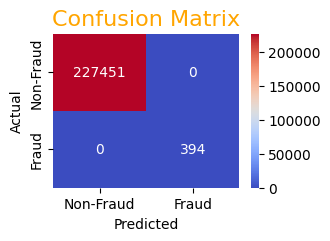


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score for Test Set: 0.9996137776061234

ROC AUC Score for Test Set: 0.9844539567374502

Confusion Matrix for Test Set:


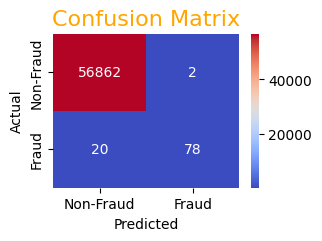

In [6]:
XGB_model(vars['x_train'], vars['x_test'], vars['y_train'], vars['y_test'])

# Model Performance After Feature Transformation

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Accuracy Score for Training Set: 1.0

ROC AUC Score for Training Set: 1.0

Confusion Matrix for Training Set:



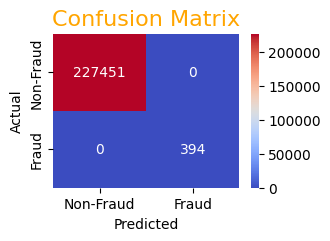


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score for Test Set: 0.9996137776061234

ROC AUC Score for Test Set: 0.9844539567374502

Confusion Matrix for Test Set:


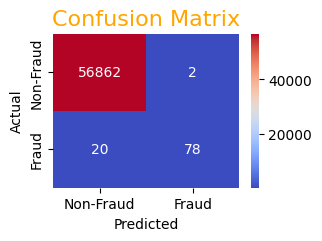

In [7]:
XGB_model(vars['x_train_pt'], vars['x_test_pt'], vars['y_train'], vars['y_test'])

# Model Performance After Implementing LDA

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.00      0.00      0.00       394

    accuracy                           1.00    227845
   macro avg       0.50      0.50      0.50    227845
weighted avg       1.00      1.00      1.00    227845

Accuracy Score for Training Set: 0.9982707542408216

ROC AUC Score for Training Set: 0.9911537816132965

Confusion Matrix for Training Set:



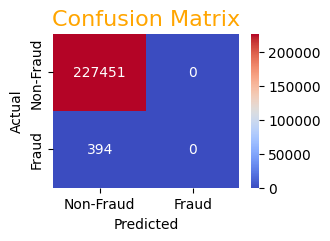


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score for Test Set: 0.9982795547909132

ROC AUC Score for Test Set: 0.9819207913187785

Confusion Matrix for Test Set:


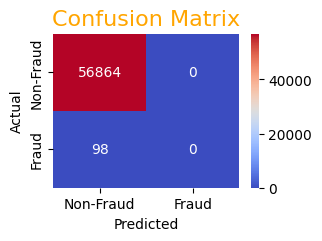

In [8]:
XGB_model(vars['x_train_lda'], vars['x_test_lda'], vars['y_train'], vars['y_test'])

# Model Performance With Cross Validation

In [9]:
cross_val(vars['x'], vars['y'])

Fold 1: ROC AUC: 0.9775442908411622, F1 Score: 0.8361581920903954, Accuracy: 0.9994908886626171
Fold 2: ROC AUC: 0.9799955128727793, F1 Score: 0.9180327868852458, Accuracy: 0.9997366665496296
Fold 3: ROC AUC: 0.9889516047700757, F1 Score: 0.8839779005524863, Accuracy: 0.9996313266972139
Fold 4: ROC AUC: 0.9733536064303497, F1 Score: 0.8651685393258427, Accuracy: 0.9995786590825302
Fold 5: ROC AUC: 0.9748130756092248, F1 Score: 0.870967741935484, Accuracy: 0.9995786590825302

Mean ROC AUC: 0.9789316181047184
Mean F1 Score: 0.8748610321578909
Mean Accuracy: 0.9996032400149042


# Model Performance After Implementing SMOTE

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00    284315

    accuracy                           1.00    568630
   macro avg       1.00      1.00      1.00    568630
weighted avg       1.00      1.00      1.00    568630

Accuracy Score for Training Set: 0.9999894483231627

ROC AUC Score for Training Set: 0.9999999999752582

Confusion Matrix for Training Set:



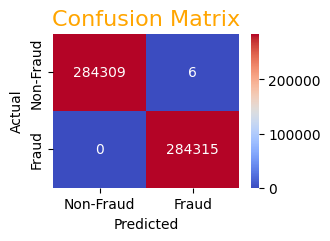


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      1.00      0.99        98

    accuracy                           1.00     56962
   macro avg       0.99      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score for Test Set: 0.999982444436642

ROC AUC Score for Test Set: 1.0

Confusion Matrix for Test Set:


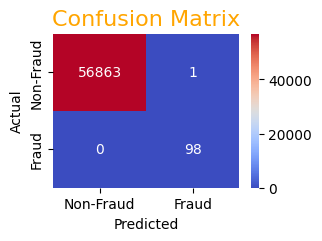

In [10]:
XGB_model(vars['x_smote'], vars['x_test'], vars['y_smote'], vars['y_test'])

# Model Performance After Implementing ADASYN

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       1.00      1.00      1.00    284319

    accuracy                           1.00    568634
   macro avg       1.00      1.00      1.00    568634
weighted avg       1.00      1.00      1.00    568634

Accuracy Score for Training Set: 0.9999560349891142

ROC AUC Score for Training Set: 0.9999999999010344

Confusion Matrix for Training Set:



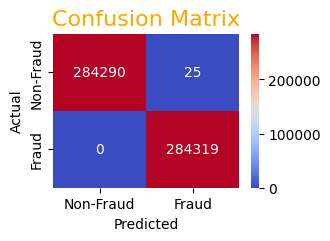


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      1.00      0.98        98

    accuracy                           1.00     56962
   macro avg       0.99      1.00      0.99     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score for Test Set: 0.9999473333099259

ROC AUC Score for Test Set: 1.0

Confusion Matrix for Test Set:


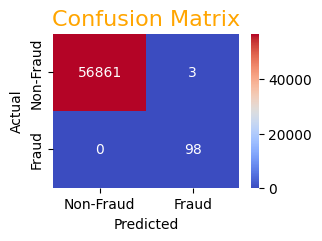

In [11]:
XGB_model(vars['x_adasyn'], vars['x_test'], vars['y_adasyn'], vars['y_test'])